In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns, math, os
from statsmodels. tsa.stattools import adfuller

df = pd.read_csv('blockchain_dot_com_daily_data.csv')

In [36]:
data = df[['datetime', 'market_price_usd', 'hash_rate']]

In [37]:
data

,datetime,market_price_usd,hash_rate
0,2009-01-03,0.00,4.971027e-08
1,2009-01-04,0.00,0.000000e+00
2,2009-01-05,0.00,0.000000e+00
3,2009-01-06,0.00,0.000000e+00
4,2009-01-07,0.00,0.000000e+00
...,...,...,...
5351,2023-08-29,26108.31,4.368632e+08
5352,2023-08-30,27731.23,3.483846e+08
5353,2023-08-31,27301.12,3.981538e+08
5354,2023-09-01,25932.99,4.175085e+08


In [41]:
price = data['market_price_usd'].tolist()
hash_ = data['hash_rate'].tolist()
adfuller(price)

(-1.8292653286552323,
 0.3660320857333156,
 33,
 5322,
 {'1%': -3.431579322976679,
  '5%': -2.862083235058105,
  '10%': -2.567059163436508},
 83343.6948082727)

In [42]:
adfuller(hash_)

(4.806709544134875,
 1.0,
 33,
 5322,
 {'1%': -3.431579322976679,
  '5%': -2.862083235058105,
  '10%': -2.567059163436508},
 186600.324501314)

In [44]:
data['diff_usd'] = (data['market_price_usd'] / data['market_price_usd'].shift(1))
data['log_usd'] = np.log(data['diff_usd'])
data['diff_hash'] = (data['hash_rate'] / data['hash_rate'].shift(1))
data['log_hash'] = np.log(data['diff_hash'])
data

/var/folders/_5/jcypzwvd5fz1trv2_rv7m_7r0000gn/T/ipykernel_23744/1883526773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['diff_usd'] = (data['market_price_usd'] / data['market_price_usd'].shift(1))
/var/folders/_5/jcypzwvd5fz1trv2_rv7m_7r0000gn/T/ipykernel_23744/1883526773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_usd'] = np.log(data['diff_usd'])
/var/folders/_5/jcypzwvd5fz1trv2_rv7m_7r0000gn/T/ipykernel_23744/1883526773.py:3: SettingWithCopyWarning: 
A value is trying to be 

,datetime,market_price_usd,hash_rate,diff_usd,log_usd,diff_hash,log_hash
0,2009-01-03,0.00,4.971027e-08,NaN,NaN,NaN,NaN
1,2009-01-04,0.00,0.000000e+00,NaN,NaN,0.000000,-inf
2,2009-01-05,0.00,0.000000e+00,NaN,NaN,NaN,NaN
3,2009-01-06,0.00,0.000000e+00,NaN,NaN,NaN,NaN
4,2009-01-07,0.00,0.000000e+00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
5351,2023-08-29,26108.31,4.368632e+08,1.000749,0.000748,1.338983,0.291910
5352,2023-08-30,27731.23,3.483846e+08,1.062161,0.060306,0.797468,-0.226313
5353,2023-08-31,27301.12,3.981538e+08,0.984490,-0.015631,1.142857,0.133531
5354,2023-09-01,25932.99,4.175085e+08,0.949887,-0.051412,1.048611,0.047467


In [47]:
data_log = data.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [48]:
data_log

,datetime,market_price_usd,hash_rate,diff_usd,log_usd,diff_hash,log_hash
593,2010-08-19,0.07,3.561656e-03,1.000000,0.000000,1.052632,0.051293
594,2010-08-20,0.07,4.248547e-03,1.000000,0.000000,1.192857,0.176351
595,2010-08-21,0.07,4.681034e-03,1.000000,0.000000,1.101796,0.096942
596,2010-08-22,0.07,5.062640e-03,1.000000,0.000000,1.081522,0.078369
597,2010-08-23,0.07,5.520567e-03,1.000000,0.000000,1.090452,0.086593
...,...,...,...,...,...,...,...
5351,2023-08-29,26108.31,4.368632e+08,1.000749,0.000748,1.338983,0.291910
5352,2023-08-30,27731.23,3.483846e+08,1.062161,0.060306,0.797468,-0.226313
5353,2023-08-31,27301.12,3.981538e+08,0.984490,-0.015631,1.142857,0.133531
5354,2023-09-01,25932.99,4.175085e+08,0.949887,-0.051412,1.048611,0.047467


In [50]:
log_usd = data_log['log_usd'].tolist()
adfuller(log_usd)

(-9.639932854888327,
 1.530512943315345e-16,
 32,
 4730,
 {'1%': -3.43173326688956,
  '5%': -2.8621512467076293,
  '10%': -2.567095368682647},
 -15580.863627959017)

In [53]:
log_hash = data_log['log_hash'].tolist()
adfuller(log_hash)

(-7.183193228158521,
 2.617318970066464e-10,
 32,
 4730,
 {'1%': -3.43173326688956,
  '5%': -2.8621512467076293,
  '10%': -2.567095368682647},
 -8303.82519322807)

Построим регрессию, предсказывающую курс биткоина (market_price_usd) в зависимости от хешрейта (hash_rate).
Построим регрессию, предсказывающую курс доллара (колонка Adj Close) в зависимости от цены на нефть (колонка Adj Close**).

In [57]:
import statsmodels.api as sm
X = data_log['hash_rate']
X_constant = sm.add_constant(X)
y = data_log['market_price_usd']
lin_reg = sm.OLS(y,X_constant).fit()
predictions = lin_reg.predict(X_constant)

In [61]:
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:       market_price_usd   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     5475.
Date:                Fri, 22 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:49:05   Log-Likelihood:                -50640.
No. Observations:                4763   AIC:                         1.013e+05
Df Residuals:                    4761   BIC:                         1.013e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2475.1952    174.072     14.219      0.0

In [66]:
X = data_log['log_hash']
X_constant = sm.add_constant(X)
y = data_log['log_usd']
lin_log = sm.OLS(y,X_constant).fit()
predict_log = lin_log.predict(X_constant)

In [67]:
print(lin_log.summary())

                            OLS Regression Results                            
Dep. Variable:                log_usd   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4030
Date:                Fri, 22 Dec 2023   Prob (F-statistic):              0.526
Time:                        16:56:30   Log-Likelihood:                 7538.2
No. Observations:                4763   AIC:                        -1.507e+04
Df Residuals:                    4761   BIC:                        -1.506e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0027      0.001      3.705      0.0

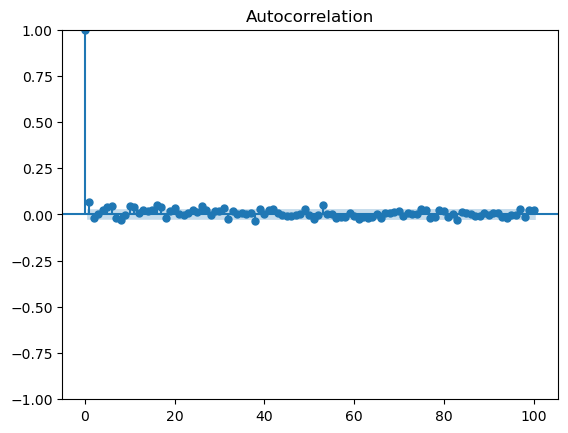

In [68]:
# Получение остатков модели
resid_log = lin_log.resid

# Построение автокорреляционной функции
sm.graphics.tsa.plot_acf(resid_log, lags=100)

# Отображение графика
plt.show()